# 3. 평가

- 분류의 성능 평가 지표
    - 정확도(Accuracy)
    - 오차 행렬(Confusion Matrix)
    - 정밀도(Precision)
    - 재현율(Recall)
    - F1 스코어
    - ROC AUC

## 정확도
$ 정확도 (Accuracy) = \frac {예측 결과가 동일한 데이터 건수} {전체 예측 데이터 건수} $

In [7]:
from sklearn.base import BaseEstimator
import numpy as np
class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음.
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        
        return pred

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

## Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

## 머신러닝에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

## Label Encoding 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

## 앞에서 실행한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('/Users/yeonsookim/Desktop/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=0)


In [10]:
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


In [11]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [12]:
class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self, X):
        return np.zeros( (len(X), 1), dtype=bool)

digits = load_digits()

y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [13]:
print(f'레이블 테스트 세트 크기 : {y_test.shape}')
print(f'테스트 세트 레이블 0과 1의 분포도\n{pd.Series(y_test).value_counts()}')

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64


In [15]:
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)

fakepred = fakeclf.predict(X_test)
print(f'모든 예측을 0으로 하여도 정확도는: {accuracy_score(y_test, fakepred)}')

모든 예측을 0으로 하여도 정확도는: 0.9


## 오차 행렬

- 이진 분류에서 성능 지표로 잘 활용됨
- 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 있는지 함께 보여주는 지표


![](https://lh3.googleusercontent.com/proxy/dJIw2HEWY0MrRH3GW9EDP2pJlXFx6CEfshwwIwWtCvX_TDV1IHYmG9qrQRY3P-SWZMHCMU2tZ1cLIYkCL5_5A_ZMtH9kbV7ncVZ6KONq4j-HrtUMxpWk7FKnACaZ0ZZUKRHUx9zdQsHiOdt-US9nFh8zDalB5TpOdvv2EGvOvAamAFKwc9QhAukhu4Jj_DrN4JgTKz_3lFcmbSgnlr9LCBUGIecgqXY2XwmYdVHP32WyUH8UqpWMAjuZlJRXKhS0HTiSiUTBtgSa4r1uWOzKRRR1Gv-XMQ)

- TN : 예측값을 Neg.로 예측했고 실제도 Neg.
- FP : Positive로 예측했는데 실제값은 Neg
- FN : Neg.로 예측했고, 실제는 Pos.
- TP : Pos.라 에측했고, 실제도 Pos.




In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

- FN이 7개다 -> 7이 아닌 digit이라 예측했지만 실제는 7이었다.

- 정확도 = 예측 결과와 실제 값이 동일한 건수/전체 데이터 수 = (TN + TP) / (TN + FP + FN + TP)

- **불균형한 이진 분류 데이터셋에서는 positive 데이터 건수가 매우 작기 때문에 negative로 예측 정확도가 높아지는 경향이 발생한다.**

- 불균형한 데이터 셋에서 정확도보다 더 선호되는 평가 지표 -> 정밀도, 재현율

## 정밀도, 재현율

- 정밀도 = TP / (FP + TP)
    - 예측을 Positive 인 대상 중에 예측과 실제값이 Positive로 일치한 데이터 비율
    - 스팸메일 여부
    - 실제 Neg.인 것을 Pos.로 잘못 판단하는 게 안좋을 떄
- 재현율 = TP / (FN + TP)
    - 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율
    - 민감도 또는 TPR(Ture Positive Rate)로 불린다
    - 재현율이 중요 지표인 경우에는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우
    - ex. 암 진단, 금융 사기 적발 모델


- 재현율과 정밀도 모두 TP를 놓이는데 초점을 두지만, 재현율은 FN(실제 P, 예측 N)를 낮추는것에, 정밀도는 FP를 낮추는 것에 초점을 둔다

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬\n', confusion)
    print(f'정확도 : {accuracy}, 정밀도 : {precision}, 재현율 : {recall}')

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
titanic_df = pd.read_csv('/Users/yeonsookim/Desktop/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                   test_size=0.2, random_state=11)

In [21]:
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

/Users/yeonsookim/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


오차 행렬
 [[108  10]
 [ 14  47]]
정확도 : 0.8659217877094972, 정밀도 : 0.8245614035087719, 재현율 : 0.7704918032786885


## 정밀도/재현율 트레이드오프

분류하려는 업무의 특성상 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 Threshold를 조정해 수치를 높일 수 있음.


하지만 이 둘은 보완적인 평가 지표이기 때문에 어느 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉬움. -> **Trade-off**


`predict_proba()` : 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환함.
- `predict()` 메서드와 유사하지만 단지 반환 결과가 예측 결과 클래스값이 아닌 **예측 확률 결과임.**

In [24]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(f'pred_proba() 결과 Shape : {pred_proba.shape}')
print(f'pred_proba array에서 앞 3개만 샘플로 추출 : \n{pred_proba[:3]}')

pred_proba() 결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 : 
[[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]


In [25]:
pred_proba

array([[0.44935227, 0.55064773],
       [0.86335512, 0.13664488],
       [0.86429645, 0.13570355],
       [0.84968519, 0.15031481],
       [0.82343411, 0.17656589],
       [0.84231224, 0.15768776],
       [0.8709549 , 0.1290451 ],
       [0.27228604, 0.72771396],
       [0.78185129, 0.21814871],
       [0.33185993, 0.66814007],
       [0.86178764, 0.13821236],
       [0.87058099, 0.12941901],
       [0.86425952, 0.13574048],
       [0.87065945, 0.12934055],
       [0.56033546, 0.43966454],
       [0.85003024, 0.14996976],
       [0.88954174, 0.11045826],
       [0.74250732, 0.25749268],
       [0.71120225, 0.28879775],
       [0.23776273, 0.76223727],
       [0.75684107, 0.24315893],
       [0.62428169, 0.37571831],
       [0.84655248, 0.15344752],
       [0.82711259, 0.17288741],
       [0.8682563 , 0.1317437 ],
       [0.77003828, 0.22996172],
       [0.82946349, 0.17053651],
       [0.9033613 , 0.0966387 ],
       [0.73372048, 0.26627952],
       [0.68847388, 0.31152612],
       [0.

- `predict()` 메서드는 predict_proba() 메서드에 기반해 생성된 API임.

In [26]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
    [2,0,0],
    [0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [27]:
custom_thr = 0.5
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_thr).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

In [28]:
get_clf_eval(y_test, custom_predict)

오차 행렬
 [[108  10]
 [ 14  47]]
정확도 : 0.8659217877094972, 정밀도 : 0.8245614035087719, 재현율 : 0.7704918032786885


In [29]:
custom_thr = 0.4
pred_proba_1 = pred_proba[:, 1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_thr).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
 [[97 21]
 [11 50]]
정확도 : 0.8212290502793296, 정밀도 : 0.704225352112676, 재현율 : 0.819672131147541


- threshold를 낮추니 재현율이 올라가고 정밀도가 떨어짐.
- 낮춘다는 것은 True값이 많아진다는 것임. -> 양성 예측을 많이 하다 보니 실제 양성을 음성으로 예측하는 횟수가 줄어들었기 때문이다.

In [30]:
thresholds = [0.4,0.45,0.5,0.55,0.6]

def get_eval_by_threshold(y_test, pred_proba_1, thresholds):
    for custom_thr in thresholds:
        binarizer = Binarizer(threshold=custom_thr).fit(pred_proba_1)
        custom_predict = binarizer.transform(pred_proba_1)
        print('THR :', custom_thr)
        get_clf_eval(y_test, custom_predict)

In [31]:
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

THR : 0.4
오차 행렬
 [[97 21]
 [11 50]]
정확도 : 0.8212290502793296, 정밀도 : 0.704225352112676, 재현율 : 0.819672131147541
THR : 0.45
오차 행렬
 [[105  13]
 [ 13  48]]
정확도 : 0.8547486033519553, 정밀도 : 0.7868852459016393, 재현율 : 0.7868852459016393
THR : 0.5
오차 행렬
 [[108  10]
 [ 14  47]]
정확도 : 0.8659217877094972, 정밀도 : 0.8245614035087719, 재현율 : 0.7704918032786885
THR : 0.55
오차 행렬
 [[111   7]
 [ 16  45]]
정확도 : 0.8715083798882681, 정밀도 : 0.8653846153846154, 재현율 : 0.7377049180327869
THR : 0.6
오차 행렬
 [[113   5]
 [ 17  44]]
정확도 : 0.8770949720670391, 정밀도 : 0.8979591836734694, 재현율 : 0.7213114754098361


In [32]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print(thresholds.shape)

thr_index = np.arange(0, thresholds.shape[0], 15)
print(thr_index)
print(np.round(thresholds[thr_index], 2))

(147,)
[  0  15  30  45  60  75  90 105 120 135]
[0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]


In [33]:
print(np.round(precisions[thr_index], 3))
print(np.round(recalls[thr_index], 3))

[0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
[1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


In [36]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = ' recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

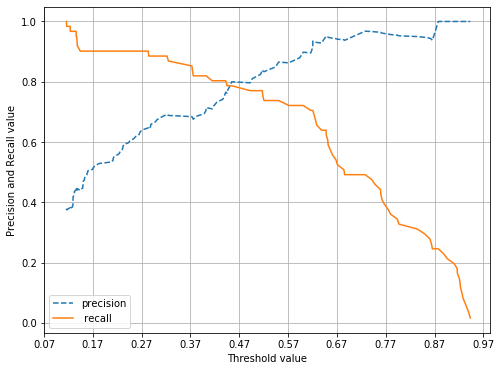

In [37]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

### 정밀도와 재현율의 맹점

- 정밀도가 100%되는 법 : 확실한 기준이 되는 경우만 positive로 에측하고, 나머지는 모두 negative로 예측함
- 재현율이 100%되는 법 : 모든 환자를 positive로 예측한다


- 적절하게 조합되는 것이 중요

## F1 score

정밀도와 재현율을 결합한 지표임.

$ F1 = 2 * \frac {precision * recall} {precision + recall} $

In [38]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print(f'F1 score : {f1}')

F1 score : 0.7966101694915254


In [39]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    f1 = f1_score(y_test, pred)
    print(confusion)
    print(f1)


In [42]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

THR : 0.4
[[97 21]
 [11 50]]
0.7575757575757576
THR : 0.45
[[105  13]
 [ 13  48]]
0.7868852459016392
THR : 0.5
[[108  10]
 [ 14  47]]
0.7966101694915254
THR : 0.55
[[111   7]
 [ 16  45]]
0.7964601769911505
THR : 0.6
[[113   5]
 [ 17  44]]
0.8


## ROC 곡선과 AUC

- ROC 곡선 : FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지 나타내는 곡선
    - TPR : 재현율, 민감도
    - TNR : 특이성. 실제값 Neg.가 정확히 예측돼야 하는 수준
- ROC 곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것, 멀어질수록 성능이 좋은 것


![](https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2020-08-05-ROC/pic1.png)


In [43]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

thr_index = np.arange(0, thresholds.shape[0], 5)
print(thr_index)
print(np.round(thresholds[thr_index],2))

print(fprs[thr_index])
print(tprs[thr_index])

[ 0  5 10 15 20 25 30 35 40 45]
[1.94 0.87 0.63 0.55 0.44 0.32 0.15 0.14 0.13 0.12]
[0.         0.00847458 0.02542373 0.05932203 0.12711864 0.20338983
 0.55932203 0.60169492 0.69491525 0.84745763]
[0.         0.24590164 0.67213115 0.73770492 0.78688525 0.8852459
 0.90163934 0.95081967 0.96721311 0.98360656]


In [46]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR ( 1 - Sensitivity )')
    plt.ylabel('TPR ( Recall )')
    plt.legend()

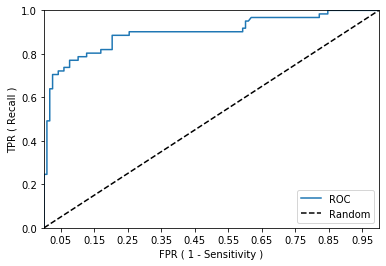

In [47]:
roc_curve_plot(y_test, pred_proba[:,1])

## 피마 인디언 당뇨병 예측

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [50]:
diabetes_data = pd.read_csv('../data/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [51]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Null값은 없으며 모두 숫자형이다

In [56]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]


In [57]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=156, stratify = y)

In [59]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

[[87 13]
 [22 32]]
0.6464646464646464


/Users/yeonsookim/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


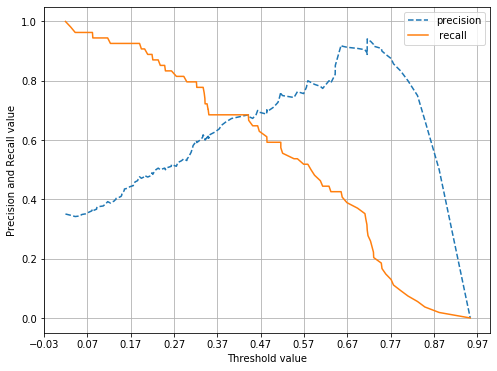

In [60]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

- 0.42 정도면 어느정도 정밀도와 재현율이 균형을 맞출 것으로 보임. 그러나 둘 다 0.7이 안됨... 너무 낮다

In [61]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- `Glucose` 수치가 0인게 많아보인다. 말이 안됨

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

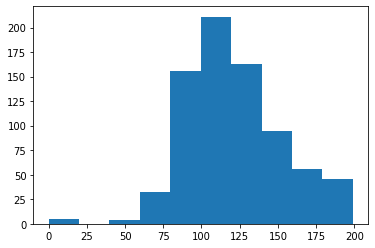

In [62]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [70]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = diabetes_data['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print(f'{feature} 0 건수는 {zero_count}, 퍼센트는 {np.round(100*zero_count/total_count, 2)}%')

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.7%
BMI 0 건수는 11, 퍼센트는 1.43%


In [71]:
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

In [73]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify = y)

In [74]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

[[90 10]
 [21 33]]
0.6804123711340206


/Users/yeonsookim/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
